# Test de hipotesis para diversas variables dentro de un modelo estadistico

Para un modelo con 4 variables de la siguiente forma:

y = b + m1x + m2y + m3z + m4a

La hipotesis/test F plantea la siguiente hipotesis nula:

b = m1 = m2 = m3 = m4 = 0. Por lo que las variables NO estarian afectando a la variable dependiente.

Si se rechaza la hipotesis nula, significa que alguna de las variables esta afectando el modelo.

## Seleccion de variables para un modelo

Hay diversas formas de seleccionar las variables significativas para un modelo. Forma forward,
backwards y stepback.

# Repaso rapido
# Clase

Queremos ver como una variable dependiente se explica por una o mas variables independientes

## Codificacion de Variables Categoricas

OHE; Binary Encoding. Casi siempre se utiliza binary encoding, ya que genera una matriz invertible. Esta caracteristica es necesaria para hacer modelos robustos.

## Regresion segun la econometria

Se define como:

y = mx + n + e

y: Variable dependiente
m: Pendiente
x: Variable independiente
n: Intercepto con el eje y
e: Error del modelo

## Bondad de ajuste

Son metricas que informar que tan bueno es nuestro modelo.

- **R2:** Cuanto explica la variable x a la variable y
- **F statistic:** Permite ver si nuestra variable/variables independientes estan afectado a la variable de dependiente (da un p-value, y se ve si acepta o rechaza la hipotesis nula)
- **Log-Likelihood:** Que tan ajustados estan los datos a la distribucion de datos. Por si solo no dice nada.
- **IC:** -Log-likelihoog/ Numero de variables. Si tenemos muchas variables, entonces el IC baja, y es peor. Por si solo no dice nada.

Aqui hay que tener cuidado igual con la interpretacion de los modelos. Porque puede que se caiga en lo mismo de la correlacion (alta correlacion-alto r2 NO significa causalidad).



# Clase nueva

## Validez de las estimaciones

Metodo de los minimos cuadrados: Quiere reducir la distancia (error) entre el valor observado y el valor predicho por el modelo. Es la suma de los errores cuadrados entre cada punto real y el punto predicho!. La prediccion que tenga la menor suma de cuadrados es el mejor modelo!

Para optimizar modelos utilizaremos Gradient Descent!

# Teorema de Gauss Markov

Permite validar a un modelo estadistico

- La media del error es 0 (O sea, que al medir diversas veces, se generen errores para arriba y para abajo)

- El error del modelo es independiente de la variable (es completamente aleatorio!)

- El error debe ser constante (media 0)

- El error debe distribuir normal

- No existe correlacion entre los residuos

# Diagnosticos de un modelo

Diversas pruebas nos permiten ver si nuestro modelo cumple el teorema o clausulas de Gauss-Markov

In [2]:
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as gfx
import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('earnings.csv').drop(columns=['Unnamed: 0'])

In [3]:
model = smf.ols('earn ~ height', df)
model = model.fit()

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.65e-30
Time:                        19:59:04   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


[]

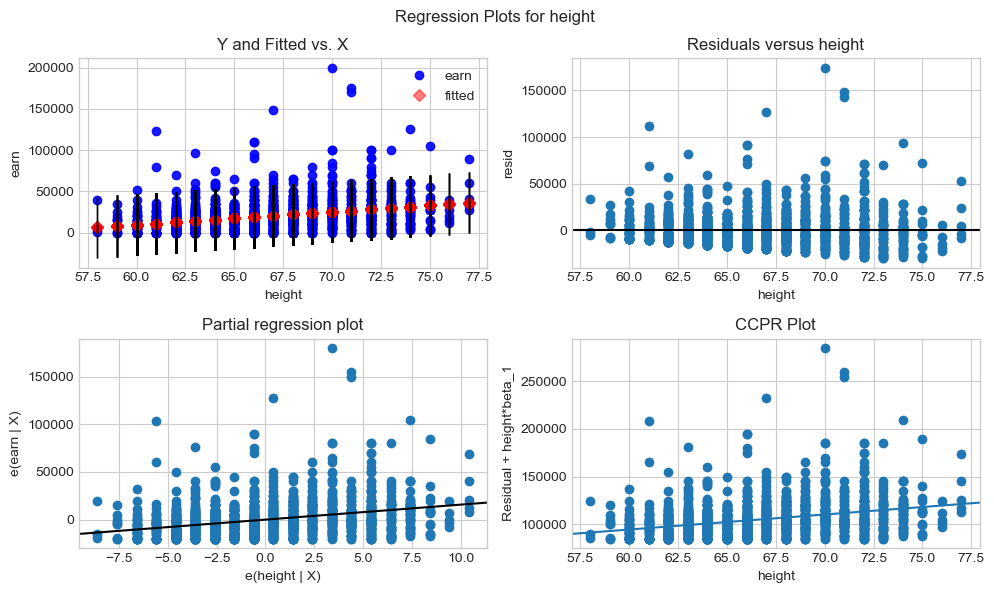

In [8]:
# Para ver los criterios de Gauss-Markov

sm.graphics.plot_regress_exog(model, 'height')
plt.plot()


Aqui se esta viendo punto por punto.

- En el grafico "residuals versus height" se ve la distribucion
de los residuos con respecto a cada height. Segun los resultados se puede ver que los residuos
estan sesgados hacia los positivos, por lo que la media de los residuos NO es 0. 

- En el mismo grafico "residuals versus height" se puede ver que los residuos NO son homocedasticos,
ya que existen outliers (Ej: Punto height 70 residuo > 150000). Esto significa que la varianza de
los residuos es alta y NO constante.


# Distintos tipos de regresiones

## Variables binarias

Son cuando se hacen modelos con variables que toman solo 2 valores (1 o 0). Aqui tambien se utiliza
un y = mx + n + e

In [21]:
modelo_binario = smf.ols('earn ~ male', data=df).fit()
modelo_binario.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.95e-41
Time:                        20:38:32   Log-Likelihood:                -15450.
No. Observations:                1374   AIC:                         3.090e+04
Df Residuals:                    1372   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+04    632.986     23.004      0.000    1.33e+04    1.58e+04
male        1.438e+04   1030.915     13.946      0.000    1.24e+04    1.64e+04
==============================================================================
Omnibus:                      864.521   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13531.216
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variables polinomiales

Se hace cuando se tienen variables distintas a x (x^2, x^3, etc). Se tienen variables independientes
no lineales

In [23]:
df['age_sq'] = df['age'] ** 2
modelo_polinomial = smf.ols('earn ~ age + age_sq', data=df).fit()
modelo_polinomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     41.06
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.80e-18
Time:                        20:38:47   Log-Likelihood:                -15501.
No. Observations:                1374   AIC:                         3.101e+04
Df Residuals:                    1371   BIC:                         3.102e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.566e+04   3975.144     -3.940      0.000   -2.35e+04   -7863.055
age         1664.1728    184.765      9.007      0.000    1301.719    2026.626
age_sq       -16.9734      1.956     -8.678      0.000     -20.810     -13.137
==============================================================================
Omnibus:                      843.307   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12732.413
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      16.988   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiples Variables Independientes

Aqui se puede modelar como la plata que se gana (earning) tiene relacion con la edad y el sexo

In [25]:
modelo_multiple = smf.ols('earn ~ age + male', data=df).fit()
modelo_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     105.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.24e-43
Time:                        20:39:43   Log-Likelihood:                -15443.
No. Observations:                1374   AIC:                         3.089e+04
Df Residuals:                    1371   BIC:                         3.091e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9517.0050   1488.355      6.394      0.000    6597.305    1.24e+04
age          120.0427     32.090      3.741      0.000      57.093     182.993
male        1.465e+04   1028.734     14.244      0.000    1.26e+04    1.67e+04
==============================================================================
Omnibus:                      866.933   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13792.663
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      17.576   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

age tiene un coef de 120.04, esto significa que se pendiente es ese valor. O sea, que cuando uno
tiene un anio mas, gana 120.04 de plata.

In [26]:
modelo = smf.ols('earn ~ ed + male', data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     206.4
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.42e-79
Time:                        20:43:37   Log-Likelihood:                -15361.
No. Observations:                1374   AIC:                         3.073e+04
Df Residuals:                    1371   BIC:                         3.074e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.064e+04   2613.174     -7.898      0.000   -2.58e+04   -1.55e+04
ed          2660.1759    192.327     13.832      0.000    2282.889    3037.462
male        1.352e+04    968.064     13.968      0.000    1.16e+04    1.54e+04
==============================================================================
Omnibus:                      829.868   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12917.525
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      17.154   Cond. No.                         76.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora que ya tenemos los modelos, como predecimos??

Con los modelos ya ajustados, hay que utilizar el metodo predict()

In [27]:
df_dummy = df.copy()

# Se le pasan los datos que se quieren predecir, y se tienen que pasar en el orden en el que se
# hizo el modelo
df_dummy['y_predicha'] = modelo.predict(df_dummy[['ed', 'male']])

In [30]:
df_dummy[['ed', 'male', 'y_predicha']]
# Ahora, se puede contrastar con los valores reales

,ed,male,y_predicha
0,16,1,35444.862717
1,16,0,21923.423771
2,16,0,21923.423771
3,17,0,24583.599688
4,15,0,19263.247854
...,...,...,...
1369,12,1,24804.159048
1370,18,0,27243.775606
1371,12,0,11282.720102
1372,12,1,24804.159048


In [32]:
df_dummy[['ed', 'male', 'y_predicha', 'earn']]
# Ahora, podemos calcular el error en la prediccion

,ed,male,y_predicha,earn
0,16,1,35444.862717,50000.0
1,16,0,21923.423771,60000.0
2,16,0,21923.423771,30000.0
3,17,0,24583.599688,51000.0
4,15,0,19263.247854,9000.0
...,...,...,...,...
1369,12,1,24804.159048,19000.0
1370,18,0,27243.775606,15000.0
1371,12,0,11282.720102,8000.0
1372,12,1,24804.159048,60000.0


In [34]:
df_dummy['error_prediccion'] = df_dummy['y_predicha'] - df_dummy['earn']
df_dummy

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male,age_sq,y_predicha,error_prediccion
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1,2025,35444.862717,-14555.137283
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0,3364,21923.423771,-38076.576229
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0,841,21923.423771,-8076.576229
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0,1521,24583.599688,-26416.400312
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0,676,19263.247854,10263.247854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,19000.0,6,0,1,1,2,12,61,72,29,1,3,1,841,24804.159048,5804.159048
1370,15000.0,5,1,2,1,2,18,8,61,82,3,3,0,6724,27243.775606,12243.775606
1371,8000.0,5,4,2,1,2,12,57,64,33,1,3,0,1089,11282.720102,3282.720102
1372,60000.0,6,0,1,1,2,12,40,72,50,3,3,1,2500,24804.159048,-35195.840952


# Regresion Lineal desde Machine Learning

Hay diversos conceptos que tienen otros nombres en machine learning, pero hacen referencia
a lo mismo.

- Modelos -> Redes, Grafos
- Variable Dependiente -> Vector Objetivo
- Variable Independiente -> Atributo
- Parametros -> Pesos
- Ajuste -> Aprendizaje

En el machine learning NO se testean hipotesis nulas! Se obtienen metricas de performance

## Pasos en el Machine Learning

1. Conocer los elementos y que representan
2. Determinar los objetivos de trabajo (que se quiere hacer, que se quiere predecir, etc)
3. Disenar e implementar los modelos
   1. Que esperamos como resultado
   2. Que parametros estimaremos
   3. Que hiper parametros consideraremos (parametros del modelo en si, no de la prediccion, no se
   estiman)

## Importacion de Modulos

- Gran parte del Machine Learning depende del scikit-learn
- Se sugiere importar solamente los modelos que utilizaremos
- Deben haber dos imports minimos
  - Uno de los modelos
  - Uno de las metricas para medir que tan buenos son los modelos

## Division de Muestras

Los datos se deben separar en datos para entrenar, y otros para testear.

In [ ]:
# Como dividir la muestra

# Si quiero predecir 'earn', entonces lo debo sacar de todo el df

y = df['earn']
x = df.drop('earn', axis=1)

y_train = y[:-30]
y_test = y[-30:]

x_train = x[:-30]
x_test = x[-30:]

Esta division se puede hacer automaticamente con la funcion train_test_split de scikit_learn

In [37]:
from sklearn.model_selection import train_test_split

# Requiere las variables X que se quieren utilizar del df, luego la y, el tamano de los datos test
# y el random state

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('earn', axis=1), df['earn'], test_size=0.3, random_state=1)
